<a href="https://colab.research.google.com/github/Tabatacsantos/Series_Temporais/blob/main/Previs%C3%A3o_PassageirosAereos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='green'> Análise de Série Temporais - Previsão de passageiros aéreos

Uma série temporal é uma sequência de pontos ordenados de forma cronológica. Normalmente, a série temporal possui uma sequência de dados equidistantes no tempo.

A análise de séries temporais é realizada com o intuito de explorar o comportamento passado e também de prever o comportamento futuro em um determinado problema.

Conjunto de dados de passageiros aéreos
https://www.kaggle.com/datasets/rakannimer/air-passengers

Objetivo: Prever a quantidade de passageiros nos próximos 12 meses

## Importação das bibliotecas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
!pip install pmdarima
from pmdarima.arima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 37.5 MB/s 
     |████████████████████████████████| 9.9 MB 54.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

## Análise exploratória

In [ ]:
# Carregamento da base de dados
base = pd.read_csv('/content/drive/MyDrive/a-Projetos_DC/AirPassengers.csv')
base.head()
#base.shape

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
# Visualização do tipo de dados dos atributos
print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


In [ ]:
# Conversão dos atributos que estão no formato string para formato de data: ANO-MÊS
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('/content/drive/MyDrive/a-Projetos_DC/AirPassengers.csv', parse_dates = ['Month'],
                   index_col = 'Month', date_parser = dateparse)
base

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
# Visualização do índice do dataframe (#Passengers) 
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
#criação da série temporal (ts)
ts = base['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [ ]:
# Visualização de registro específico
ts[1]

118

In [ ]:
# Visualização por ano e mês
ts['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [ ]:
# Visualização de data específica
ts[datetime(1949,2,1)]

118

In [ ]:
# Visualização de intervalos
ts['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [ ]:
# Visualização de intervalos sem preencher a data de início
ts[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [ ]:
# Visualização por ano
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [ ]:
# Valores máximos 
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [ ]:
# mínimos
ts.index.min()

Timestamp('1949-01-01 00:00:00')

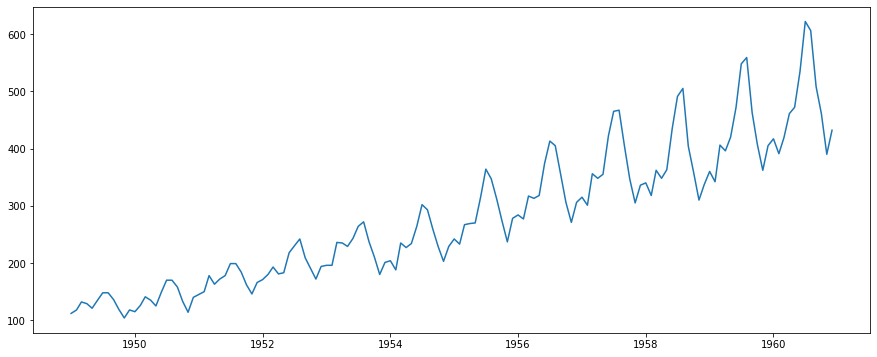

In [ ]:
# Visualização da série temporal completa
plt.plot(ts)

Month
1949-12-31    1520
1950-12-31    1676
1951-12-31    2042
1952-12-31    2364
1953-12-31    2700
1954-12-31    2867
1955-12-31    3408
1956-12-31    3939
1957-12-31    4421
1958-12-31    4572
1959-12-31    5140
1960-12-31    5714
Freq: A-DEC, Name: #Passengers, dtype: int64

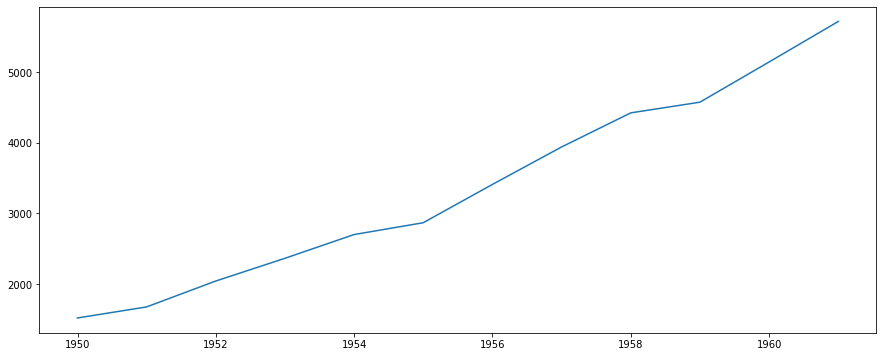

In [ ]:
# Visualização por ano
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)
ts_ano

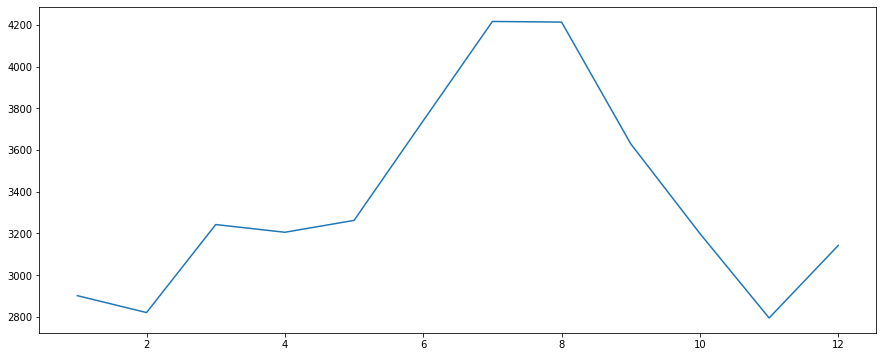

In [ ]:
# Visualização por mês
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

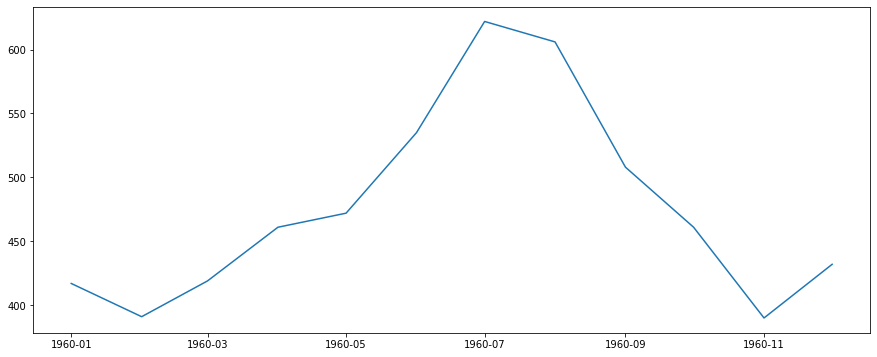

In [ ]:
# Visualização entre datas específicas
ts_datas = ts['1960-01-01':'1960-12-01']
plt.plot(ts_datas)

# Decomposição da série temporal

A decomposição é um procedimento matemático de dividir uma série temporal única em várias séries temporais diferentes. Geralmente, a série temporal é dividida em 3 componentes: tendência, sazonalidade e flutuação aleatória.

In [ ]:
# Decomposição da série temporal, criando uma variável para cada formato
from statsmodels.tsa.seasonal import seasonal_decompose
decomposicao = seasonal_decompose(ts)

In [ ]:
#tendencia
tendencia = decomposicao.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [ ]:
#sozonalidade
sazonal = decomposicao.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [ ]:
#erro - componente aleatório que não faz parte nem da sazonalidade ou da tendência
aleatorio = decomposicao.resid
aleatorio

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

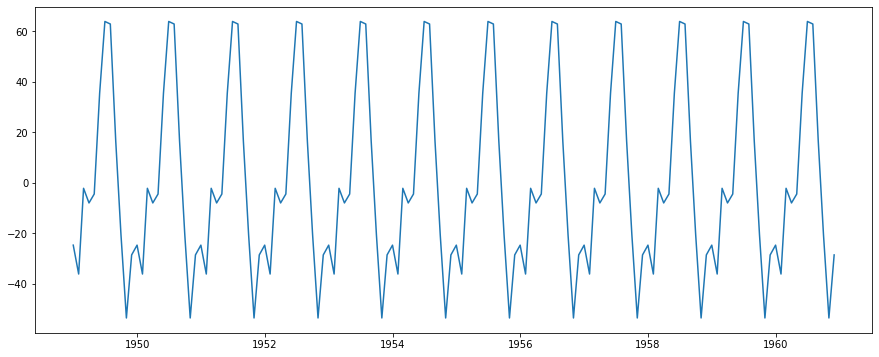

In [ ]:
# Visualização da sazonalidade
plt.plot(sazonal)

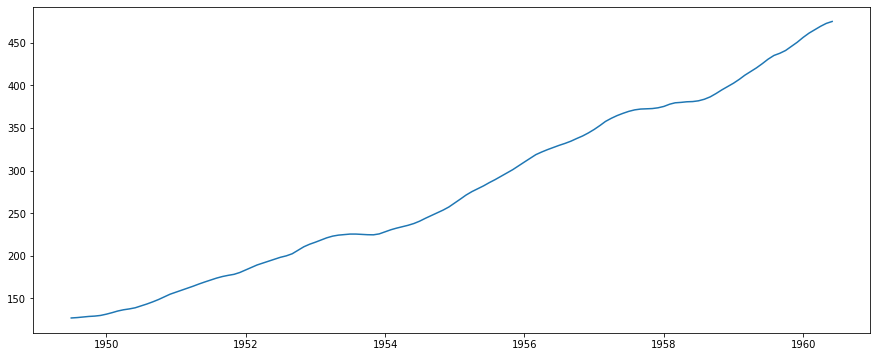

In [ ]:
# Visualização da tendência
plt.plot(tendencia)

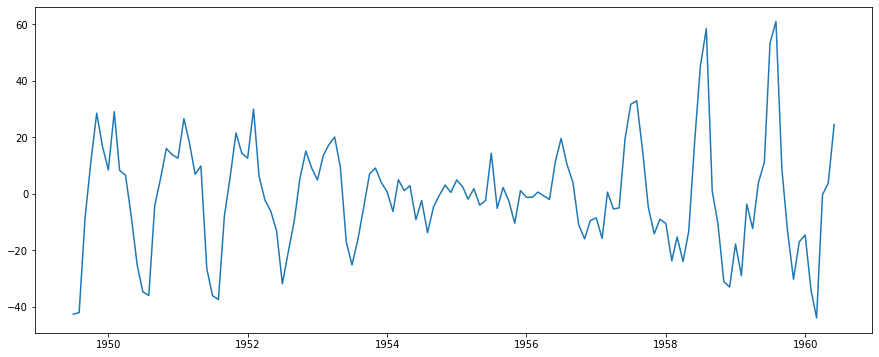

In [ ]:
# Visualização da aleatoriedade
plt.plot(aleatorio)

Visuação da série original e suas decomposições

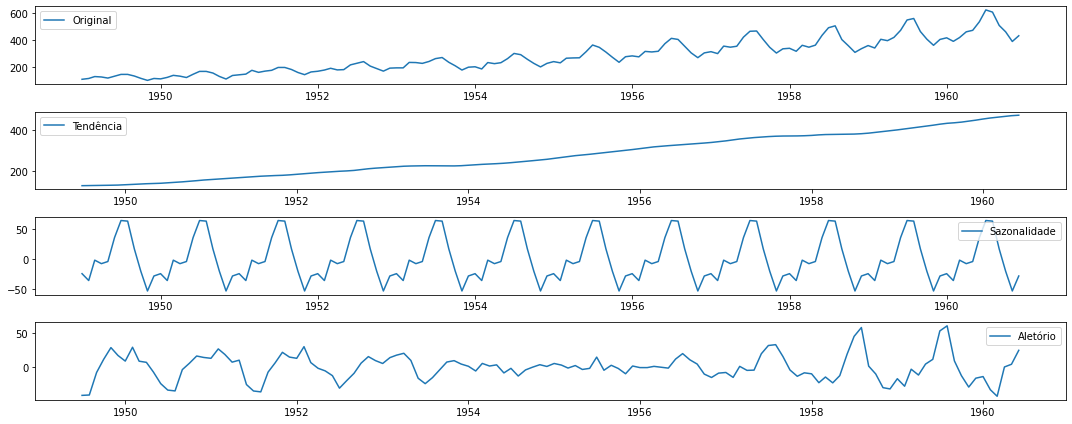

In [ ]:
plt.subplot(4,1,1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

# Visualização somente da tendência
plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc = 'best')

# Visualização somente da sazonalidade
plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazonalidade')
plt.legend(loc = 'best')

# Visualização somente do elemento aleatório
plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Aletório')
plt.legend(loc = 'best')
plt.tight_layout()

## Modelo Arima

Método estatístico que utiliza autoregressão e médias móveis para previsão de séries temporais. 

ARIMA possui seus próprios parâmetros, que no campo de séries temporais são chamados de “termos”.

São utilizados para afiar o seu modelo, os principais: p, d e q.

p: O número de lags que foram devem ser incluídos no modelo.

d: O número de vezes que as observações serão diferenciadas.

q: O tamanho de uma janela de média móvel. Também chamada de ordem de média móvel.

In [ ]:
#conversão dos atributos que estão no formato string para o formato ano-mês
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('/content/drive/MyDrive/a-Projetos_DC/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

In [ ]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


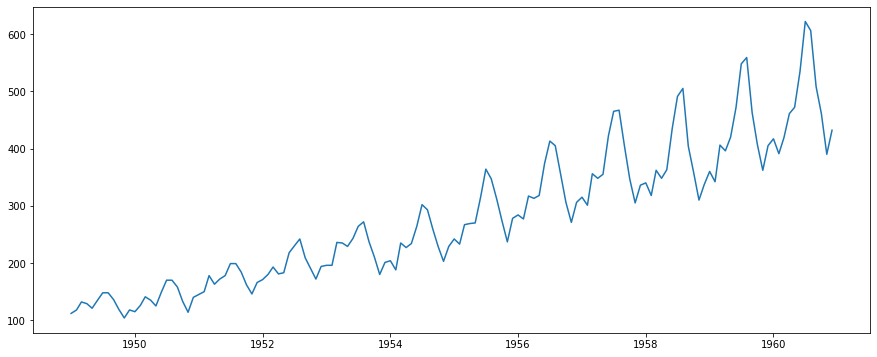

In [ ]:
plt.plot(data)

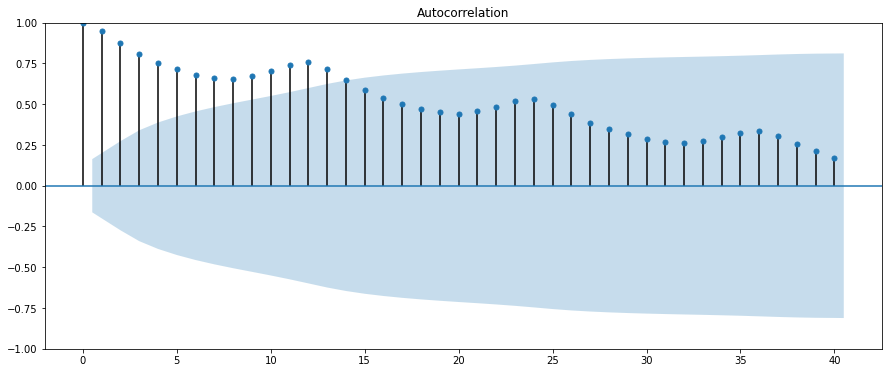

In [ ]:
# Autocorrelação dos dados
# os dados anteriores tendem a ter mais correlação do que os posteriores
plot_acf(data, lags=40)
pyplot.show()

In [ ]:
#o modelo vai testando combinações de parâmetros para verificar melhor modelo
stepwise_model = auto_arima(data, start_p=1,start_q=1,start_d= 0, start_P=0, max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.13 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.28 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.17 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.52 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.15 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.38 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.76 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.13 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.45 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.35 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=1.25 sec
 ARIM

In [ ]:
print(stepwise_model.aic())

1012.9907964954155


In [ ]:
# Sepração treino e teste
train = data.loc['1949-01-01':'1959-12-01']
test = data.loc['1960-01-01':] # 1960

In [ ]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [ ]:
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [ ]:
# Treinando o modelo
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
# Previsão dos próximos 12 meses
future_forecast = stepwise_model.predict(n_periods=12)

In [ ]:
future_forecast

1960-01-01    420.237414
1960-02-01    398.453361
1960-03-01    461.908103
1960-04-01    450.689533
1960-05-01    474.006576
1960-06-01    537.919686
1960-07-01    612.238342
1960-08-01    623.590381
1960-09-01    520.169748
1960-10-01    462.319623
1960-11-01    412.931297
1960-12-01    453.754639
Freq: MS, dtype: float64

Previsão do que aconteceu e o previsto

In [ ]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["#Passengers"])

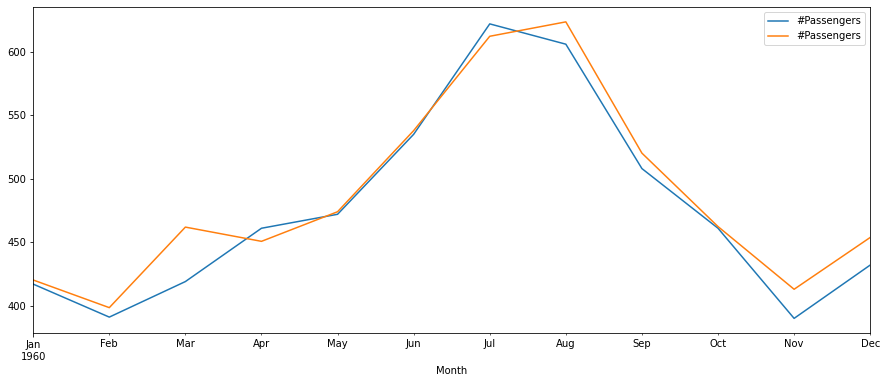

In [ ]:
#azul test laranja forecast
pd.concat([test,future_forecast],axis=1).plot()

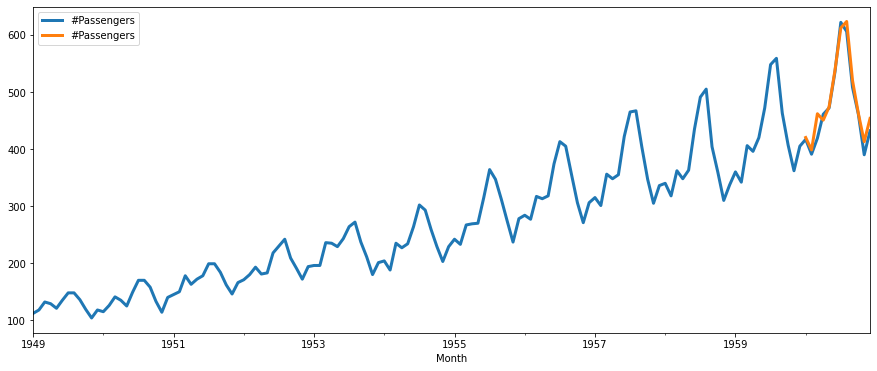

In [ ]:
pd.concat([data,future_forecast],axis=1).plot(linewidth=3)